## 实验题目4 牛顿(Newton)迭代法

### 代码实现

In [1]:
using Printf
using Plots
using NLsolve

In [2]:
# newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0)
    n = 1
    while n <= N
        F = f(x0)
        DF = df(x0)
        if abs(F) < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x0)
            return x0
        end
        if abs(DF) < ϵ2
            @printf("Reach a critical point!\n")
            return
        end
        x1 = x0 - F / DF
        Tol = abs(x1 - x0)
        if Tol < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x1)
            return x1
        end
        n = n + 1
        x0 = x1
    end
    @printf("Fail to converge within %d iterations!\n", N)
end
# multi-root newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0, λ)
    n = 1
    while n <= N
        F = f(x0)
        DF = df(x0)
        if abs(F) < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x0)
            return x0
        end
        if abs(DF) < ϵ2
            @printf("Reach a critical point!\n")
            return
        end
        x1 = x0 - λ * F / DF
        Tol = abs(x1 - x0)
        if Tol < ϵ1
            @printf("iter:%3d\troot:%18.12f\n", n - 1, x1)
            return x1
        end
        n = n + 1
        x0 = x1
    end
    @printf("Fail to converge within %d iterations!\n", N)
end

newton (generic function with 2 methods)

### 问题 1

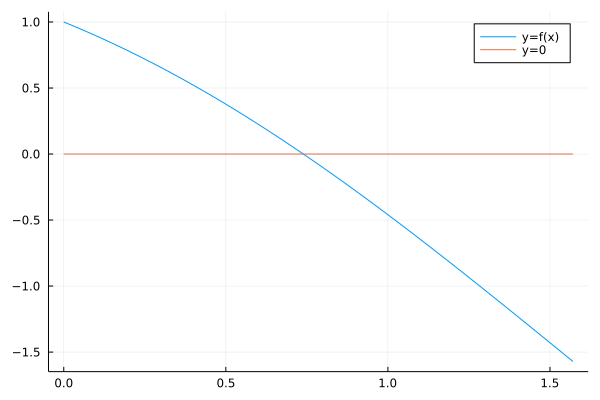

  4.481277 seconds (14.39 M allocations: 740.038 MiB, 6.15% gc time, 100.00% compilation time)
iter:  2	root:    0.739085178106
  0.142334 seconds (647.66 k allocations: 34.485 MiB, 99.89% compilation time)
library root solver:	[0.7390851332151611]
single root solver:	[0.7390851781060086]


In [3]:
f(x) = cos(x) - x
df(x) = -sin(x) - 1
x = range(start=0, stop=pi / 2, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
display(plot(x, y, label=label))
# https://discourse.julialang.org/t/basic-usage-of-nlsolve-for-scalar-problems/28489
# https://github.com/JuliaNLSolvers/NLsolve.jl
function f!(r, x)
    r .= f.(x)
end
function j!(J, x)
    (s1, s2) = size(J)
    J .= zeros(s1, s1)
    for i in 1:s1
        J[i, i] = df(x[i])
    end
end
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.785398163  # pi/4
@time sol = nlsolve(f!, j!, [x0]; method=:newton)
# println(sol)
r1 = sol.zero
@time r2 = newton(f, df, ϵ1, ϵ2, N, x0)
println("library root solver:\t$r1")
println("single root solver:\t$([r2])")

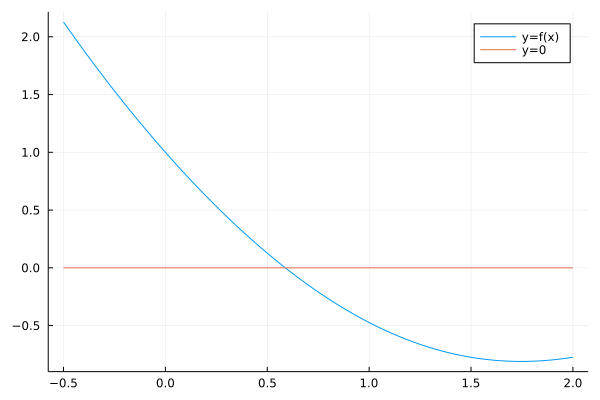

  0.057724 seconds (129.02 k allocations: 6.544 MiB, 99.92% compilation time)
iter:  2	root:    0.588532742848
  0.012201 seconds (8.19 k allocations: 440.885 KiB, 98.31% compilation time)
library root solver:	[0.588532742847979]
single root solver:	[0.588532742847979]


In [4]:
f(x) = exp(-x) - sin(x)
df(x) = -exp(-x) - cos(x)
x = range(start=-1 / 2, stop=2, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
display(plot(x, y, label=label))
function f!(r, x)
    r .= f.(x)
end
function j!(J, x)
    (s1, s2) = size(J)
    J .= zeros(s1, s1)
    for i in 1:s1
        J[i, i] = df(x[i])
    end
end
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.6
@time sol = nlsolve(f!, j!, [x0]; method=:newton)
# println(sol)
r1 = sol.zero
@time r2 = newton(f, df, ϵ1, ϵ2, N, x0)
println("library root solver:\t$r1")
println("single root solver:\t$([r2])")

### 问题 2

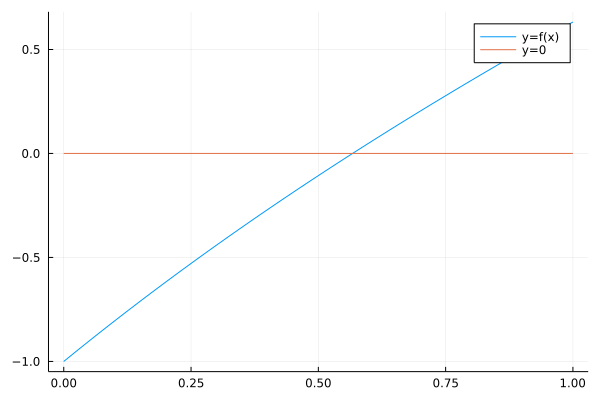

  0.056985 seconds (134.73 k allocations: 6.888 MiB, 99.91% compilation time)
iter:  2	root:    0.567143165035
  0.011849 seconds (8.07 k allocations: 437.271 KiB, 98.63% compilation time)
library root solver:	[0.5671432904097811]
single root solver:	[0.5671431650348622]


In [5]:
f(x) = x - exp(-x)
df(x) = 1 + exp(-x)

x = range(start=0, stop=1, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
display(plot(x, y, label=label))
function f!(r, x)
    r .= f.(x)
end
function j!(J, x)
    (s1, s2) = size(J)
    J .= zeros(s1, s1)
    for i in 1:s1
        J[i, i] = df(x[i])
    end
end

ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.5

@time sol = nlsolve(f!, j!, [x0]; method=:newton)
# println(sol)
r1 = sol.zero
@time r2 = newton(f, df, ϵ1, ϵ2, N, x0)
println("library root solver:\t$r1")
println("single root solver:\t$([r2])")

In [6]:
f(x) = x^2 - 2x * exp(-x) + exp(-2x)
# df(x) = 2x - (2exp(-x)-2x*exp(-x)) -2exp(-2x)
df(x) = 2(x - exp(-x)) * (1 + exp(-x))
x = range(start=0, stop=1, length=100)
c(x) = 0
y = [f.(x), c.(x)]
label = ["y=f(x)" "y=0"]
plot(x, y, label=label)
function f!(r, x)
    r .= f.(x)
end
function j!(J, x)
    (s1, s2) = size(J)
    J .= zeros(s1, s1)
    for i in 1:s1
        J[i, i] = df(x[i])
    end
end
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 20
x0 = 0.5
λ = 2
@time sol = nlsolve(f!, j!, [x0]; method=:newton)
# println(sol)
r1 = sol.zero
@time r2 = newton(f, df, ϵ1, ϵ2, N, x0)
@time r3 = newton(f, df, ϵ1, ϵ2, N, x0, λ)  # multi-root newton method
println("library root solver:\t$r1")
println("sigle root solver:\t$([r2])")
println("multi-root solver:\t$([r3])")

  0.059333 seconds (145.75 k allocations: 7.441 MiB, 99.91% compilation time)
iter:  7	root:    0.566605704128
  0.012172 seconds (8.71 k allocations: 463.430 KiB, 99.26% compilation time)
iter:  2	root:    0.567143165035
  0.013084 seconds (9.09 k allocations: 482.157 KiB, 99.16% compilation time)
library root solver:	[0.5671096851375182]
sigle root solver:	[0.566605704128146]
multi-root solver:	[0.5671431650348469]


### 思考题

1. 对问题 1 确定初值的原则是什么？实际计算中应如何解决？

   选择一个有根区间，本例中容易得到
   
   $f(x)=\cos(x)-x$，有$f(0)=1>0,f(\frac{\pi}{2})=-\frac{\pi}{2}<0$，取区间中点即$x=\frac{\pi}{4}$为初值
   
   $f(x)=e^{-x} - \sin(x)$，有$f(0)=1>0,f(1.2)\approx-0.631<0$，同样取区间中点即$x=0.6$为初值
   
   实际计算中，根据其他算法求出多个精度较粗的有根区间，然后使用牛顿法逼近获得较为精确的数值解。
   
   通常，对于我们而言，可能在给定区间直接作出函数图像是最简单最可行的方式。
   
   > https://computingskillset.com/solving-equations/how-to-find-the-initial-guess-in-newtons-method/
   > 
   > https://math.stackexchange.com/questions/743373/how-to-choose-the-starting-point-in-newtons-method

   在我所查找的资料中提及，对于更一般的情形，试图通过程序自动化来计算函数的根的话，情况会变得更加复杂，涉及到多个领域的研究。
   
   > https://en.wikipedia.org/wiki/Newton_fractal
   > 
   > [How to find all roots of complex polynomials by Newton’s method](https://link.springer.com/article/10.1007/s002220100149)

2. 对问题 2 如何解释在计算中出现的现象？试加以说明

   本例中，
   
   $(1)f_1(x) = x - e^{-x}=0$

   ```
   iter:  2	root:    0.567143165035
   
   library root solver:	[0.5671432904097811]  0.059150 seconds (134.73 k allocations: 6.888 MiB, 99.88% compilation time)
   single root solver:	[0.5671431650348622]  0.011558 seconds (8.06 k allocations: 436.974 KiB, 99.16% compilation time)
   ```
   $(2)f_2(x) = x^2 - 2xe^{-x} + e^{-2x}=(x - e^{-x})^{2}={f_1}^2(x)=0$
      
   ```
   iter:  7	root:    0.566605704128
   iter:  2	root:    0.567143165035
   
   library root solver:	[0.5671096851375182]  0.061985 seconds (145.75 k allocations: 7.441 MiB, 99.87% compilation time)
   sigle root solver:	[0.566605704128146]   0.012734 seconds (8.72 k allocations: 463.742 KiB, 98.70% compilation time)
   multi-root solver:	[0.5671431650348469]  0.012515 seconds (9.09 k allocations: 481.673 KiB, 98.24% compilation time)
   ```
   
   显然，方程(2)在方程(1)的根位置有重根，可以看到直接应用牛顿迭代法计算轮数为7轮，耗时通常情况下稍微增加，但由于当前实例计算简单、精度要求低，耗时变化不明显，不过能看到在给定精度要求情况下所得精度低于无重根牛顿迭代法。

   由理论课知识可知，当存在重根时牛顿迭代法的收敛速度为线性收敛。在后续使用修正的牛顿法可以使收敛速度重新达到平方收敛，耗时几乎与无重根时一致，迭代次数和精度也相同。

   除此以外，在本实验中，直接手写的牛顿法运行效率意外的高于库函数直接使用的效率，耗时更短，内存消耗更小，这是让人十分意外的。当然，事实上在同一数量级时间的差异并不大，而库函数代码通用于解非线性系统，仍然是求解实际问题时的优选。

   不过，在后期由julia控制台直接运行时所消耗的时间并非如此，考虑到可能是使用IJulia在Jupyter Notebook环境下运行的时间损耗，如下所示。

   ```
   julia> @time sol = nlsolve(f!,j!,[pi/4];method = :newton)
     0.000031 seconds (42 allocations: 2.578 KiB)
   Results of Nonlinear Solver Algorithm
    * Algorithm: Newton with line-search
    * Starting Point: [0.7853981633974483]
    * Zero: [0.739085133215161]
    * Inf-norm of residuals: 0.000000
    * Iterations: 3
    * Convergence: true
      * |x - x'| < 0.0e+00: false
      * |f(x)| < 1.0e-08: true
    * Function Calls (f): 4
    * Jacobian Calls (df/dx): 4
   ```
3. 略
